# Regularization - L2 Ridge Regression

## <font color=#50AAF5>Data acquisition </font>

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# to make this notebook's output stable across runs, the seed will always get the same value
np.random.seed(42)

In [2]:
X = np.array([i*np.pi/180 for i in range(60,300,4)])
y = np.sin(X) + np.random.normal(0, 0.15, len(X))

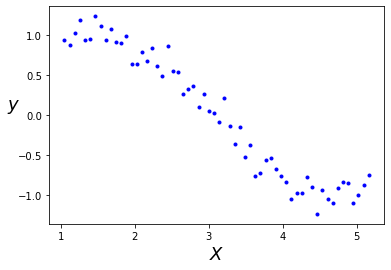

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18);

## <font color=#50AAF5>Model </font>

In [4]:
X.shape, y.shape
X = X.reshape(-1, 1)
X.shape

(60, 1)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=15, include_bias=False)
X_poly = poly_features.fit_transform(X)
scaler = StandardScaler() 
X_poly_scaled = scaler.fit(X_poly) 

### <font color=#6FC24D>Pipeline </font>

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

model = Pipeline([("poly_features", PolynomialFeatures(degree=15, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("linear_reg", LinearRegression())])

In [7]:
model.fit(X, y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=15, include_bias=False,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [8]:
y_pred = model.predict(X)

## <font color=#50AAF5>Plot </font>

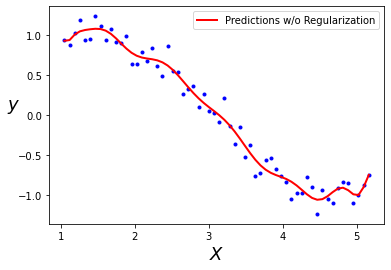

In [9]:
plt.plot(X, y, "b.")
plt.plot(X, y_pred, "r-", linewidth=2, label="Predictions w/o Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=10);

## <font color=#50AAF5>Ridge </font>

In [10]:
from sklearn.linear_model import Ridge

model_ridge = Pipeline([("poly_features", PolynomialFeatures(degree=15, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("ridge", Ridge(alpha = 0.001, solver = 'cholesky', random_state = 42))])
model_ridge.fit(X, y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=15, include_bias=False,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridge',
                 Ridge(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=42,
                       solver='cholesky', tol=0.001))],
         verbose=False)

In [11]:
y_pred = model_ridge.predict(X)

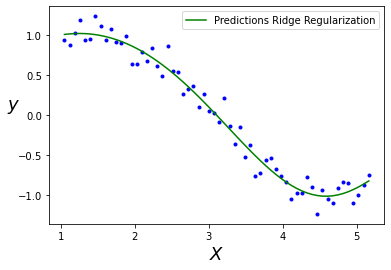

In [12]:
plt.plot(X, y, "b.")
plt.plot(X, y_pred, "g-",label="Predictions Ridge Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=10);